## a) Notebook Settings

In [1]:
# Show ALL outputs in cell, not only last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
relative_filepath = "../../"

In [3]:
# Set relative path mapping for module imports
import sys

sys.path.append(relative_filepath)

#for path in sys.path:
#    print(path)

## b) Dependencies

In [4]:
# External Dependencies
import numpy as np
import pandas as pd

## c) Load Pickled Data

In [5]:
# Read in pickled combined data
X_y_data = pd.read_pickle(relative_filepath + "data/interim/X_y_data.pkl")
X_combined = pd.read_pickle(relative_filepath + "data/interim/X_combined.pkl")
y_combined = pd.read_pickle(relative_filepath + "data/interim/y_combined.pkl")

# Read in pickled train data
X_y_train = pd.read_pickle(relative_filepath + "data/interim/X_y_train.pkl")
X_train = pd.read_pickle(relative_filepath + "data/interim/X_train.pkl")
y_train = pd.read_pickle(relative_filepath + "data/interim/y_train.pkl")

# Read in pickled test data
X_y_test = pd.read_pickle(relative_filepath + "data/interim/X_y_test.pkl")
X_test = pd.read_pickle(relative_filepath + "data/interim/X_test.pkl")
y_test = pd.read_pickle(relative_filepath + "data/interim/y_test.pkl")

In [6]:
# Recap data structure
X_y_data.head()
X_y_data.shape

target = "classLabel"

input_dfs = [X_y_data,
             X_combined,
             X_y_train,
             X_train,
             X_y_test,
             X_test]

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,classLabel
0,a,"17,92","5,4e-05",u,"-0,840182024985552","0,522882590622095","1,75",f,t,1,t,g,80.0,5,800000,t,0,no.
1,b,"16,92","3,35e-05",y,"-2,15963506605476","0,774187133555115","0,29",f,f,0,f,s,200.0,0,2e+06,NaN,0,no.
2,b,"31,25","0,0001125",u,"1,75068668089807","0,76036270650308",0,f,t,1,f,g,96.0,19,960000,t,0,no.
3,a,"48,17","0,0001335",u,"4,17487068567425","0,888963139486792","0,335",f,f,0,f,g,0.0,120,0,NaN,0,no.
4,b,"32,33","0,00035",u,"-3,78547915257514","0,489023844085239","0,5",f,f,0,t,g,232.0,0,2.32e+06,f,0,no.


(3900, 18)

## d) Pandas Profiling

#### i) Profile Report

In [10]:
from pandas_profiling import ProfileReport

In [11]:
profile = ProfileReport(X_y_data, title='Pandas Profiling Report', minimal=True)
profile.to_file(output_file=relative_filepath + "reports/PANDAS_PROFILE_X_y_data.html")

#profile.to_widgets()
#profile.to_notebook_iframe()

#### ii) Actions from Pandas Profile Report

## e) Dabl

#### i) Report

In [14]:
import dabl

In [15]:
dabl_X_y_train_dtypes = dabl.detect_types(X_y_train)
dabl_X_y_train_dtypes

dabl_X_y_test_dtypes = dabl.detect_types(X_y_test)
dabl_X_y_test_dtypes

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
v1,False,False,False,True,False,False,False
v2,True,False,False,False,False,False,False
v3,True,False,False,False,False,False,False
v4,False,False,False,True,False,False,False
v5,True,False,False,False,False,False,False
v6,True,False,False,False,False,False,False
v7,True,False,False,False,False,False,False
v8,False,False,False,True,False,False,False
v9,False,False,False,True,False,False,False
v10,False,False,True,False,False,False,False


,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
v1,False,False,False,True,False,False,False
v2,True,False,False,False,False,False,False
v3,True,False,False,False,False,False,False
v4,False,False,False,True,False,False,False
v5,True,False,False,False,False,False,False
v6,True,False,False,False,False,False,False
v7,True,False,False,False,False,False,False
v8,False,False,False,True,False,False,False
v9,False,False,False,True,False,False,False
v10,False,False,True,False,False,False,False


In [19]:
# Dabl Clean Train
dabl_X_y_train_clean = dabl.clean(X_y_train,
                                  return_types = False,
                                  target_col = target,
                                  verbose=1) 

# Dabl Clean Test
dabl_X_y_test_clean = dabl.clean(X_y_test,
                                 return_types = False,
                                 target_col = target,
                                 verbose=1) 

Detected feature types:
7 float, 4 int, 7 object, 0 date, 0 other
Interpreted as:
continuous      8
dirty_float     0
low_card_int    1
categorical     9
date            0
free_string     0
useless         0
dtype: int64
Detected feature types:
7 float, 4 int, 7 object, 0 date, 0 other
Interpreted as:
continuous      8
dirty_float     0
low_card_int    1
categorical     9
date            0
free_string     0
useless         0
dtype: int64


Target looks like classification


/opt/conda/lib/python3.7/site-packages/dabl/plot/utils.py:630: UserWarning: Dropped 32 outliers in column v10.
  int(dropped), series.name), UserWarning)
/opt/conda/lib/python3.7/site-packages/dabl/plot/utils.py:630: UserWarning: Dropped 16 outliers in column v14.
  int(dropped), series.name), UserWarning)
/opt/conda/lib/python3.7/site-packages/dabl/plot/utils.py:630: UserWarning: Dropped 18 outliers in column v13.
  int(dropped), series.name), UserWarning)


Linear Discriminant Analysis training set score: 0.500
Target looks like classification


/opt/conda/lib/python3.7/site-packages/dabl/plot/utils.py:630: UserWarning: Dropped 1 outliers in column v13.
  int(dropped), series.name), UserWarning)


Linear Discriminant Analysis training set score: 0.764


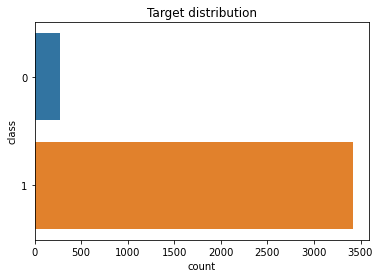

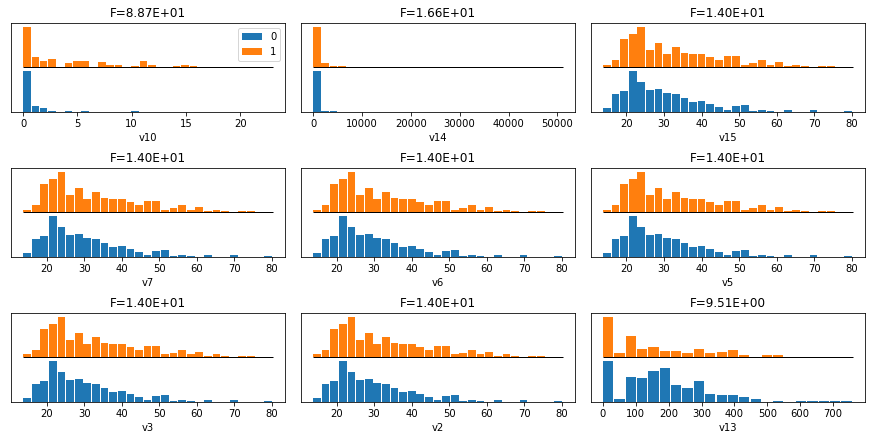

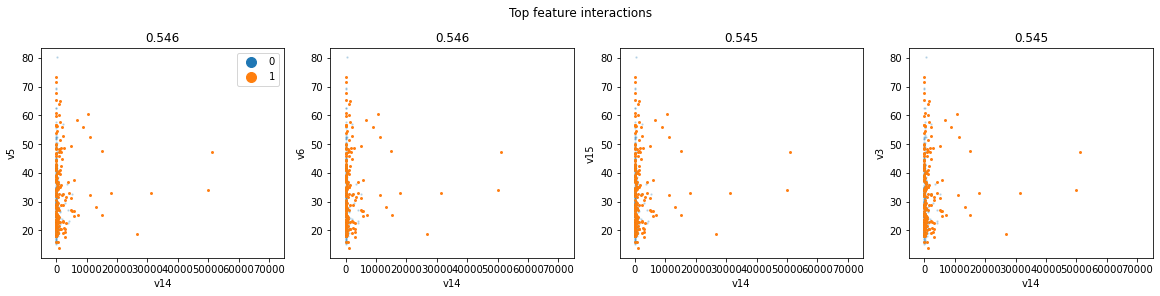

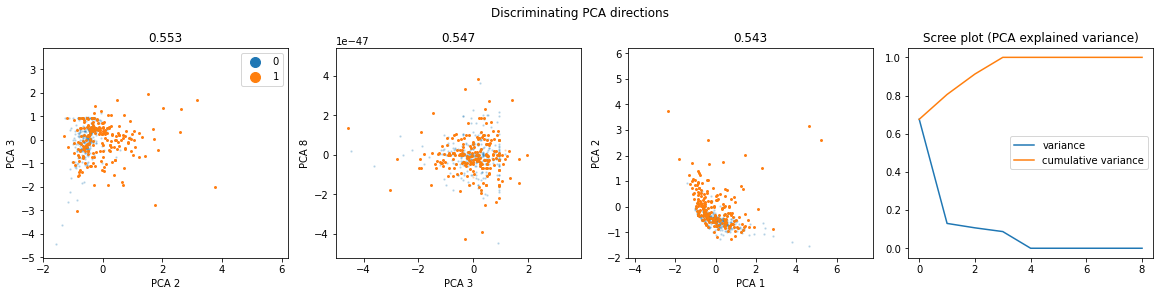

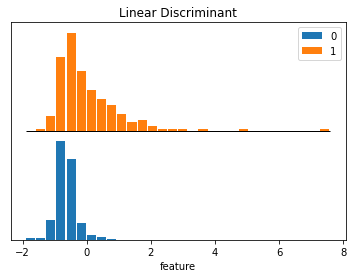

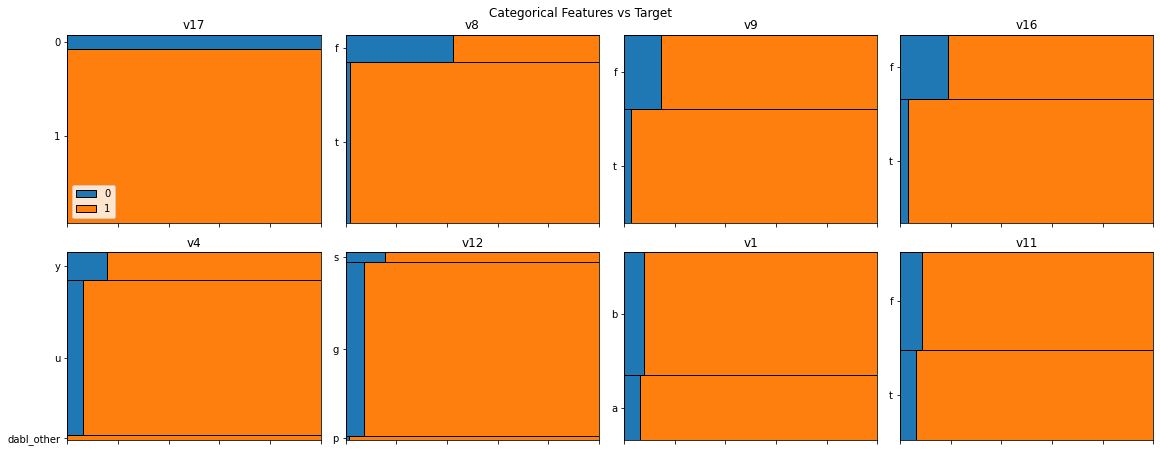

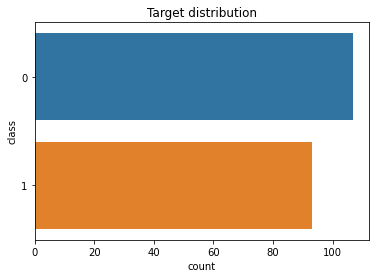

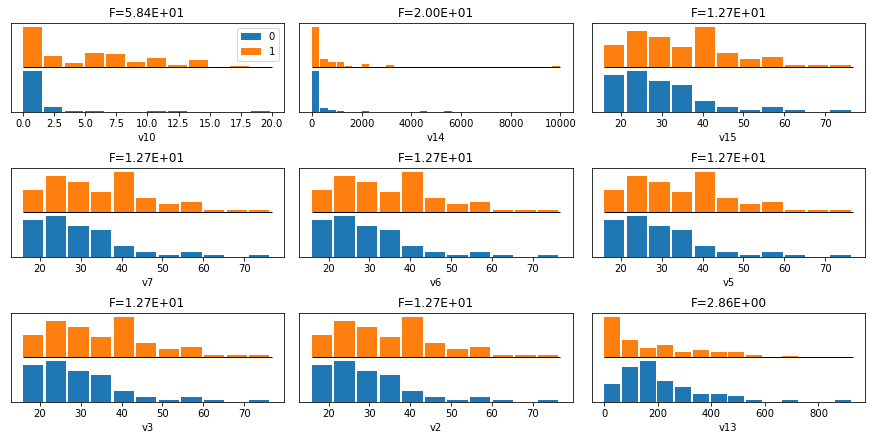

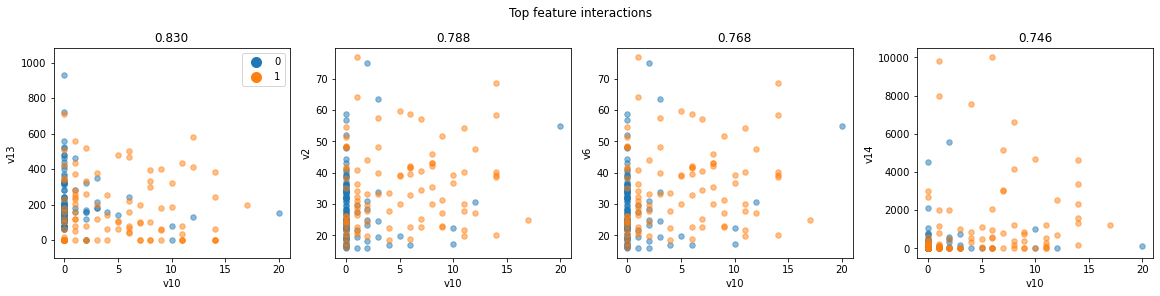

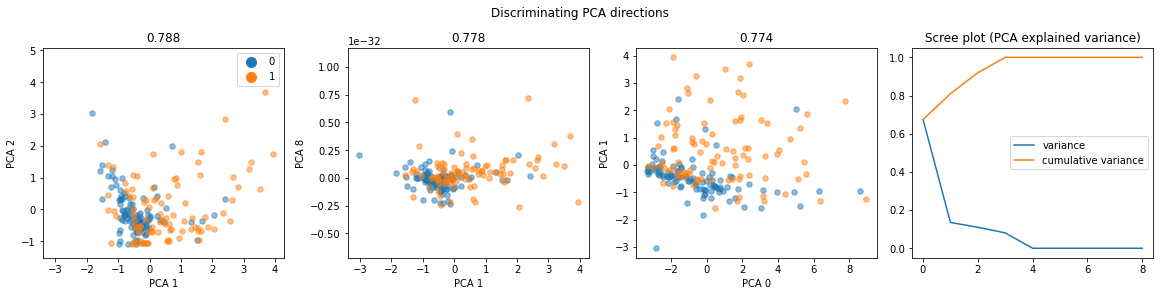

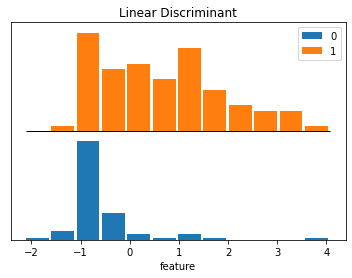

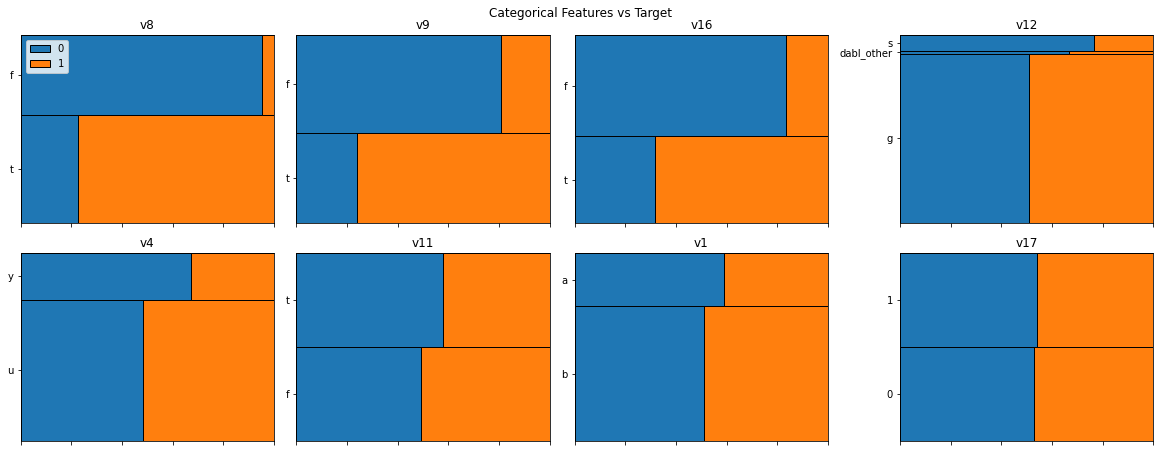

In [21]:
dabl.plot(dabl_X_y_train_clean,
          target_col = target)

dabl.plot(dabl_X_y_test_clean,
          target_col = target)

#### ii) Actions from Dabl Report

In [ ]:
# ACTION: Do any data types need to be handled?

# dabl_X_y_train_clean = dabl.clean(X_y_train,
#                                   type_hints={"": ""})

# dabl_X_y_test_clean = dabl.clean(X_y_test,
#                                  type_hints={"": ""})

Running DummyClassifier(strategy='prior')
accuracy: 0.925 average_precision: 0.075 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.481
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.925 average_precision: 0.075 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.481

Running GaussianNB()
accuracy: 1.000 average_precision: 0.075 roc_auc: 1.000 recall_macro: 1.000 f1_macro: 1.000
=== new best GaussianNB() (using recall_macro):
accuracy: 1.000 average_precision: 0.075 roc_auc: 1.000 recall_macro: 1.000 f1_macro: 1.000

Running MultinomialNB()
accuracy: 0.999 average_precision: 0.039 roc_auc: 1.000 recall_macro: 0.995 f1_macro: 0.997
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 1.000 average_precision: 0.075 roc_auc: 1.000 recall_macro: 1.000 f1_macro: 1.000
Running DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 1.000 average_precision: 0.075 roc_auc: 1.000 recall_macro: 1.000 f1_macro: 1.000
Running Deci

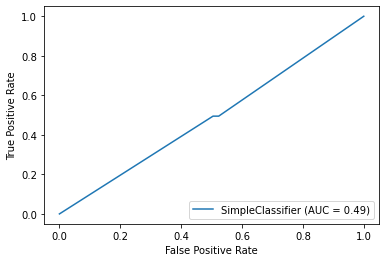

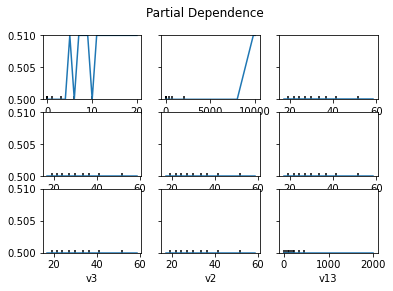

In [22]:
# Initial Model Building with dabl
# The SimpleClassifier implements the familiar scikit-learn API of fit and predict

dabl_X_train = dabl_X_y_train_clean.drop([target], axis=1)
dabl_y_train = dabl_X_y_train_clean[target]

dabl_X_test = dabl_X_y_test_clean.drop([target], axis=1)
dabl_y_test = dabl_X_y_test_clean[target]

sc = dabl.SimpleClassifier(random_state=0) \
         .fit(dabl_X_train, dabl_y_train) 

print("Mean Accuracy on the given TEST data and labels:", sc.score(dabl_X_test, dabl_y_test))

dabl.explain(sc, dabl_X_test, dabl_y_test)

## e) SweetViz

#### i) Report

In [23]:
import sweetviz

X_y_data_report = sweetviz.analyze([X_y_data, "Combined"],
                                   target_feat=target,
                                   pairwise_analysis="on")

train_test_split_report = sweetviz.compare([X_y_train, "Train"],
                                           [X_y_test, "Test"],
                                           target_feat=target,
                                           pairwise_analysis="on")

X_y_data_report.show_html(relative_filepath + "reports/SWEET_VIZ_X_y_data_report.html",
                          open_browser=True,
                          layout='vertical',
                          scale=None)

train_test_split_report.show_html(relative_filepath + "reports/SWEET_VIZ_train_test_split_report.html",
                                  open_browser=True,
                                  layout='vertical',
                                  scale=None)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de


Report ../../reports/SWEET_VIZ_X_y_data_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Report ../../reports/SWEET_VIZ_train_test_split_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### ii) Actions from Sweetviz Report

In [ ]:
#dict_ = {}

## f) Autoviz

#### i) Report

Imported AutoViz_Class version: 0.0.79. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (3900, 18)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  7
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  5
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0


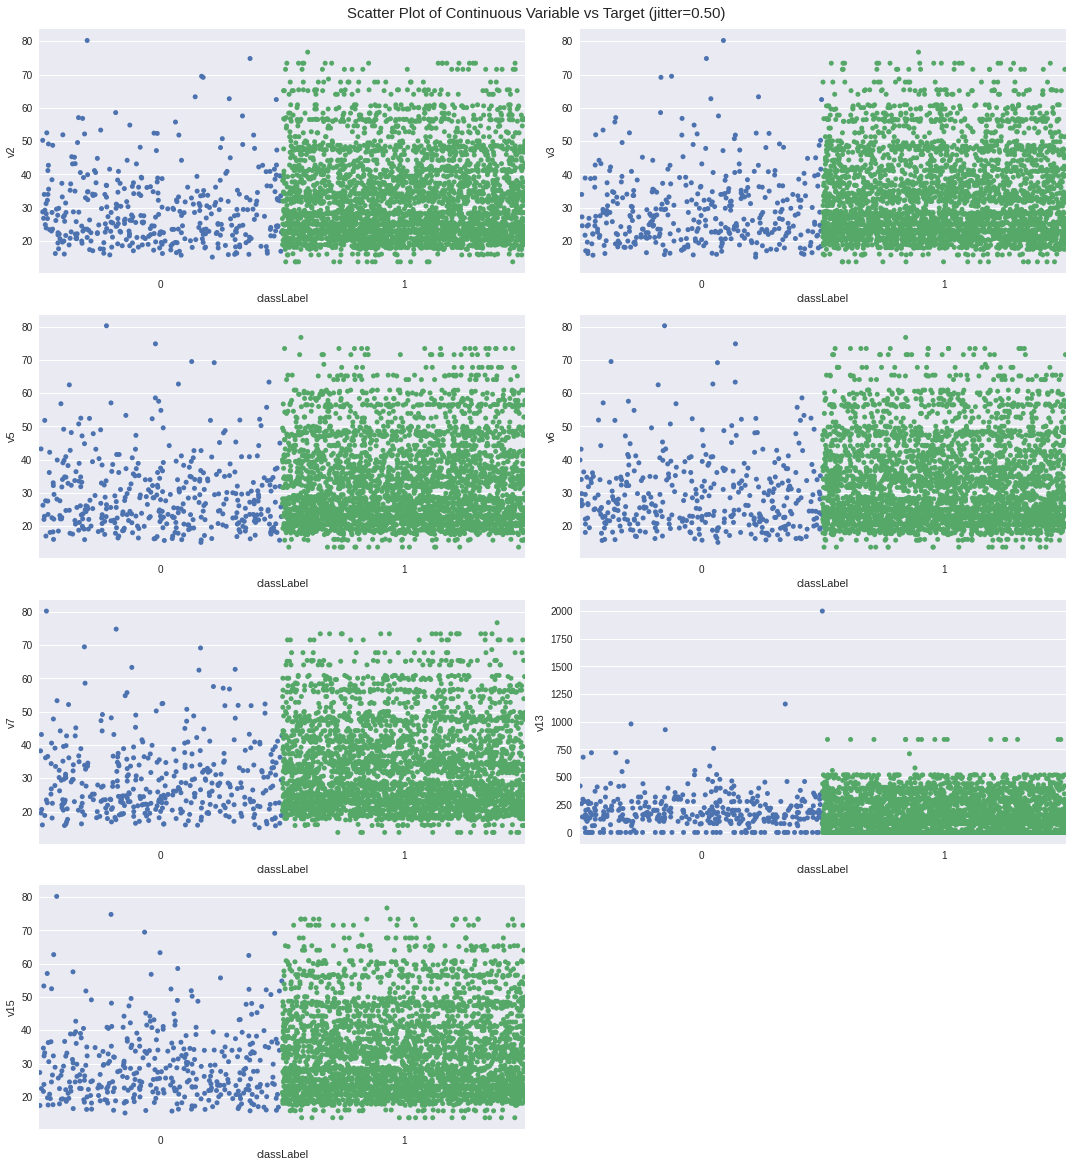

Using Lowess Smoothing. This might take a few minutes for large data sets...
Total Number of Scatter Plots = 28


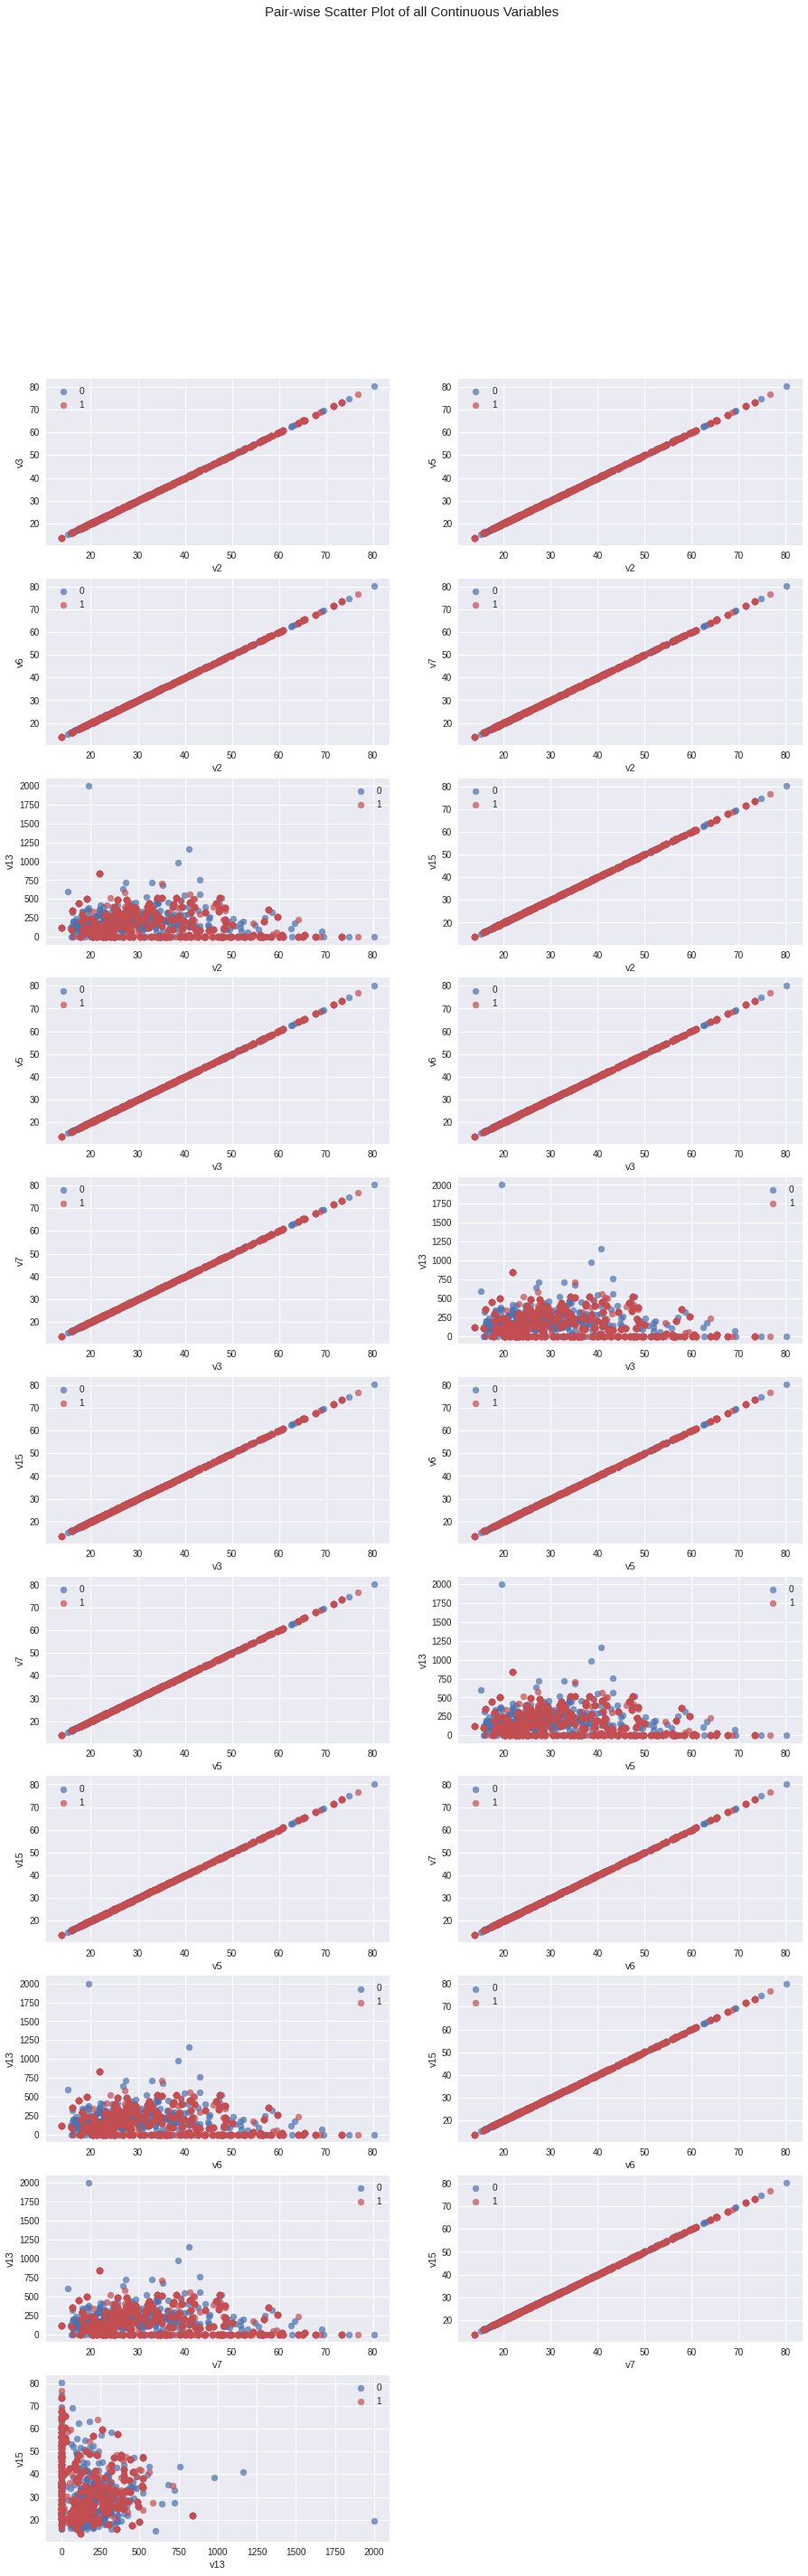

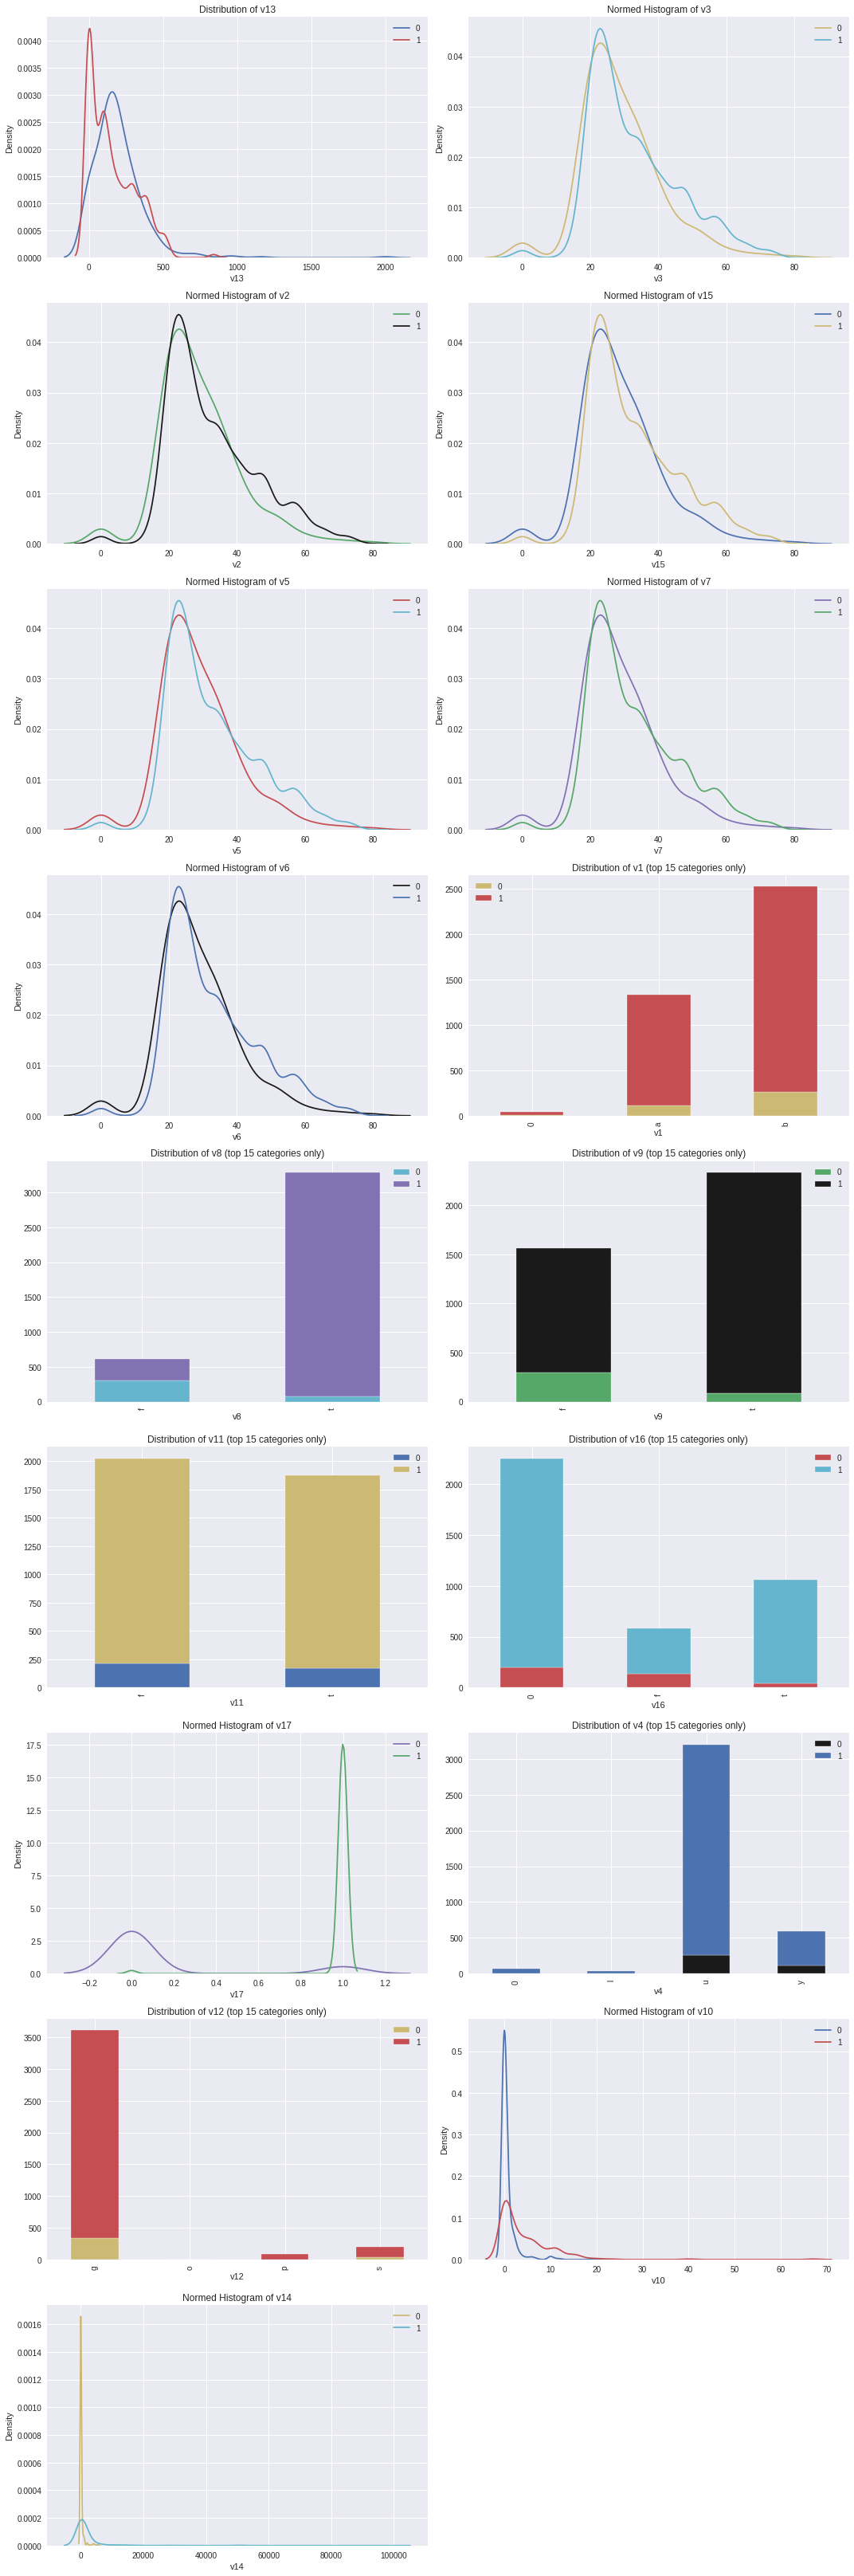

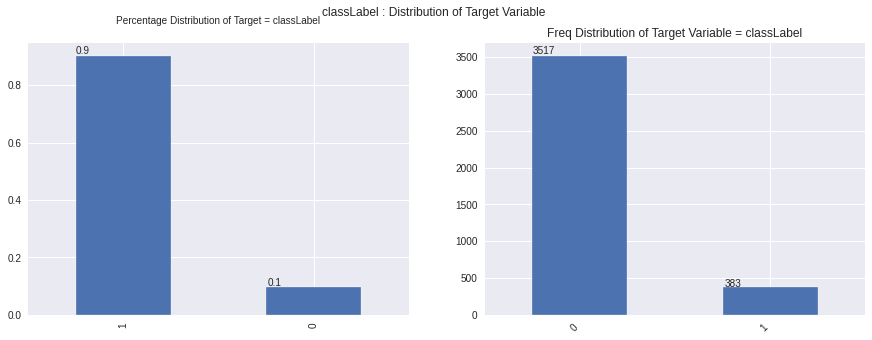

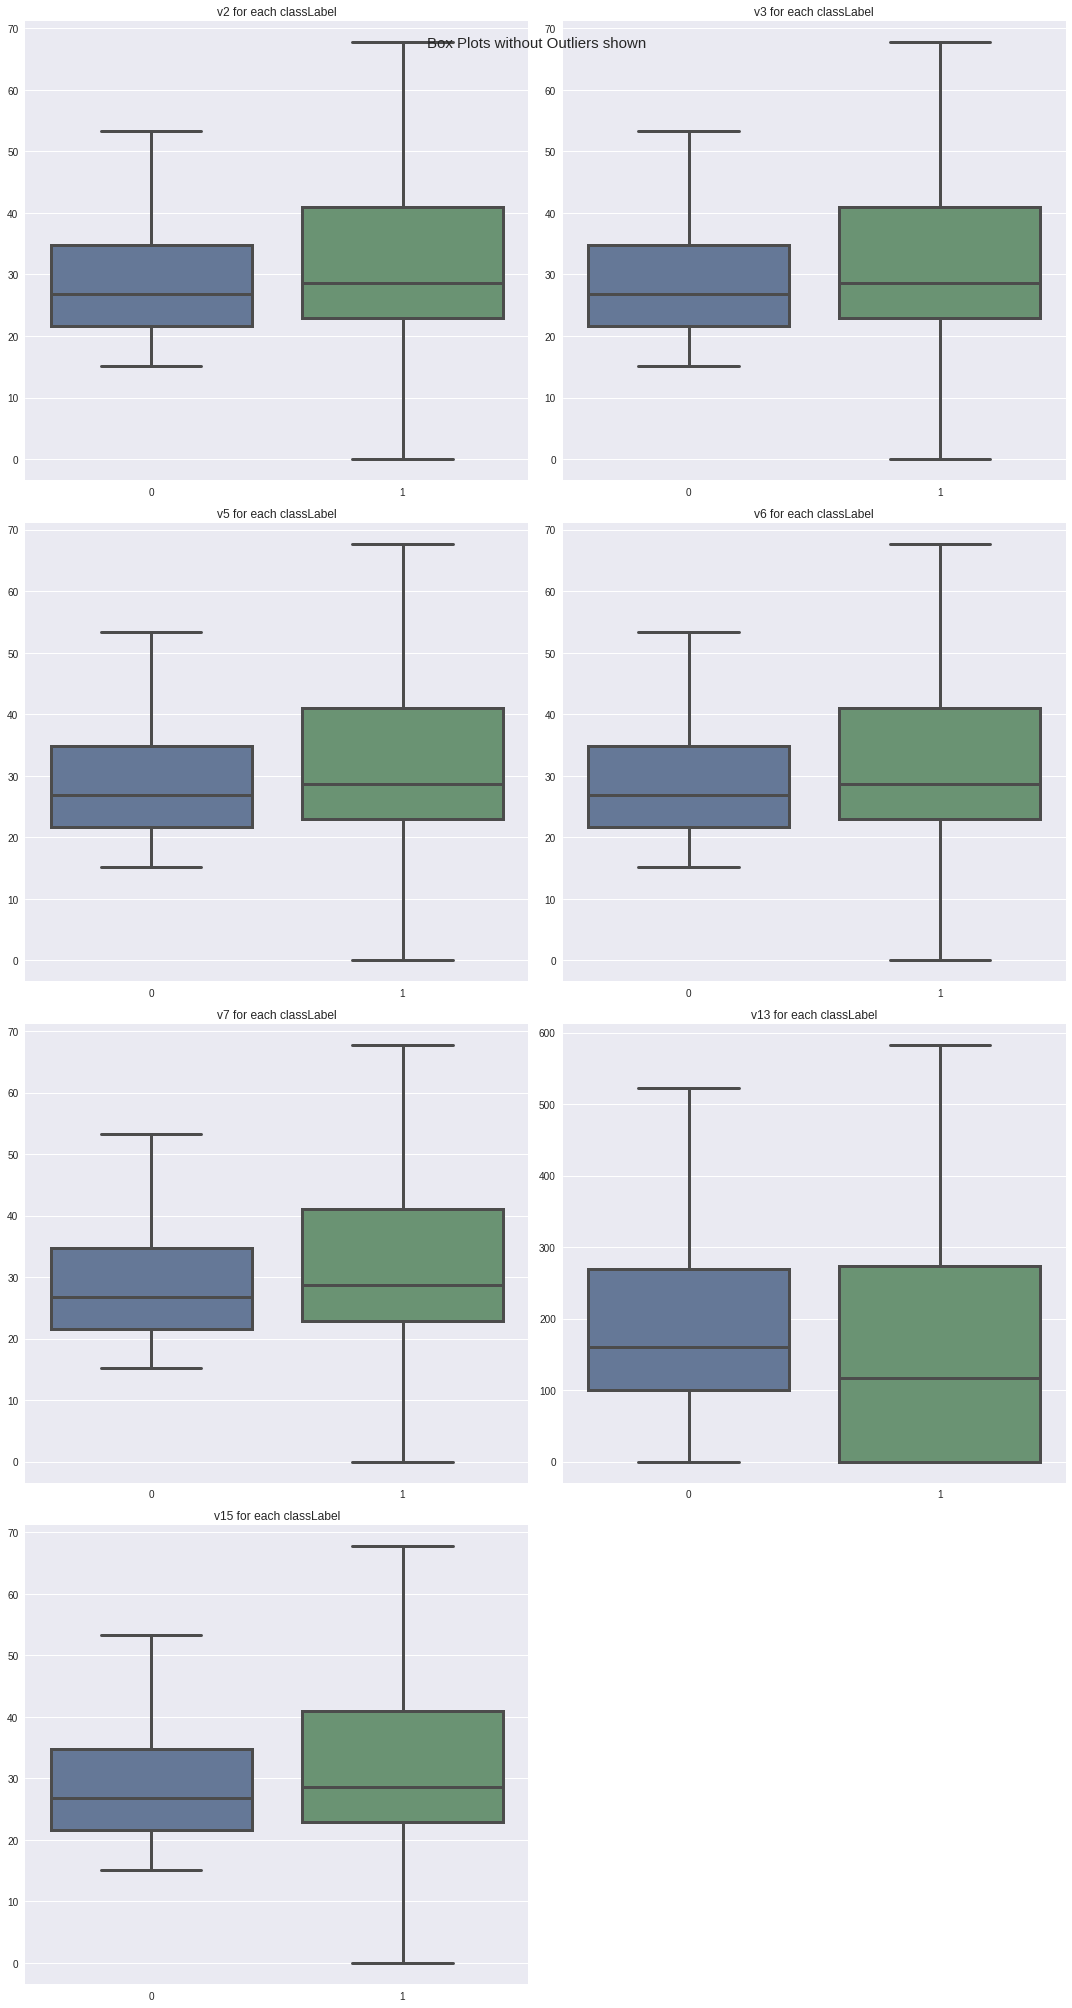

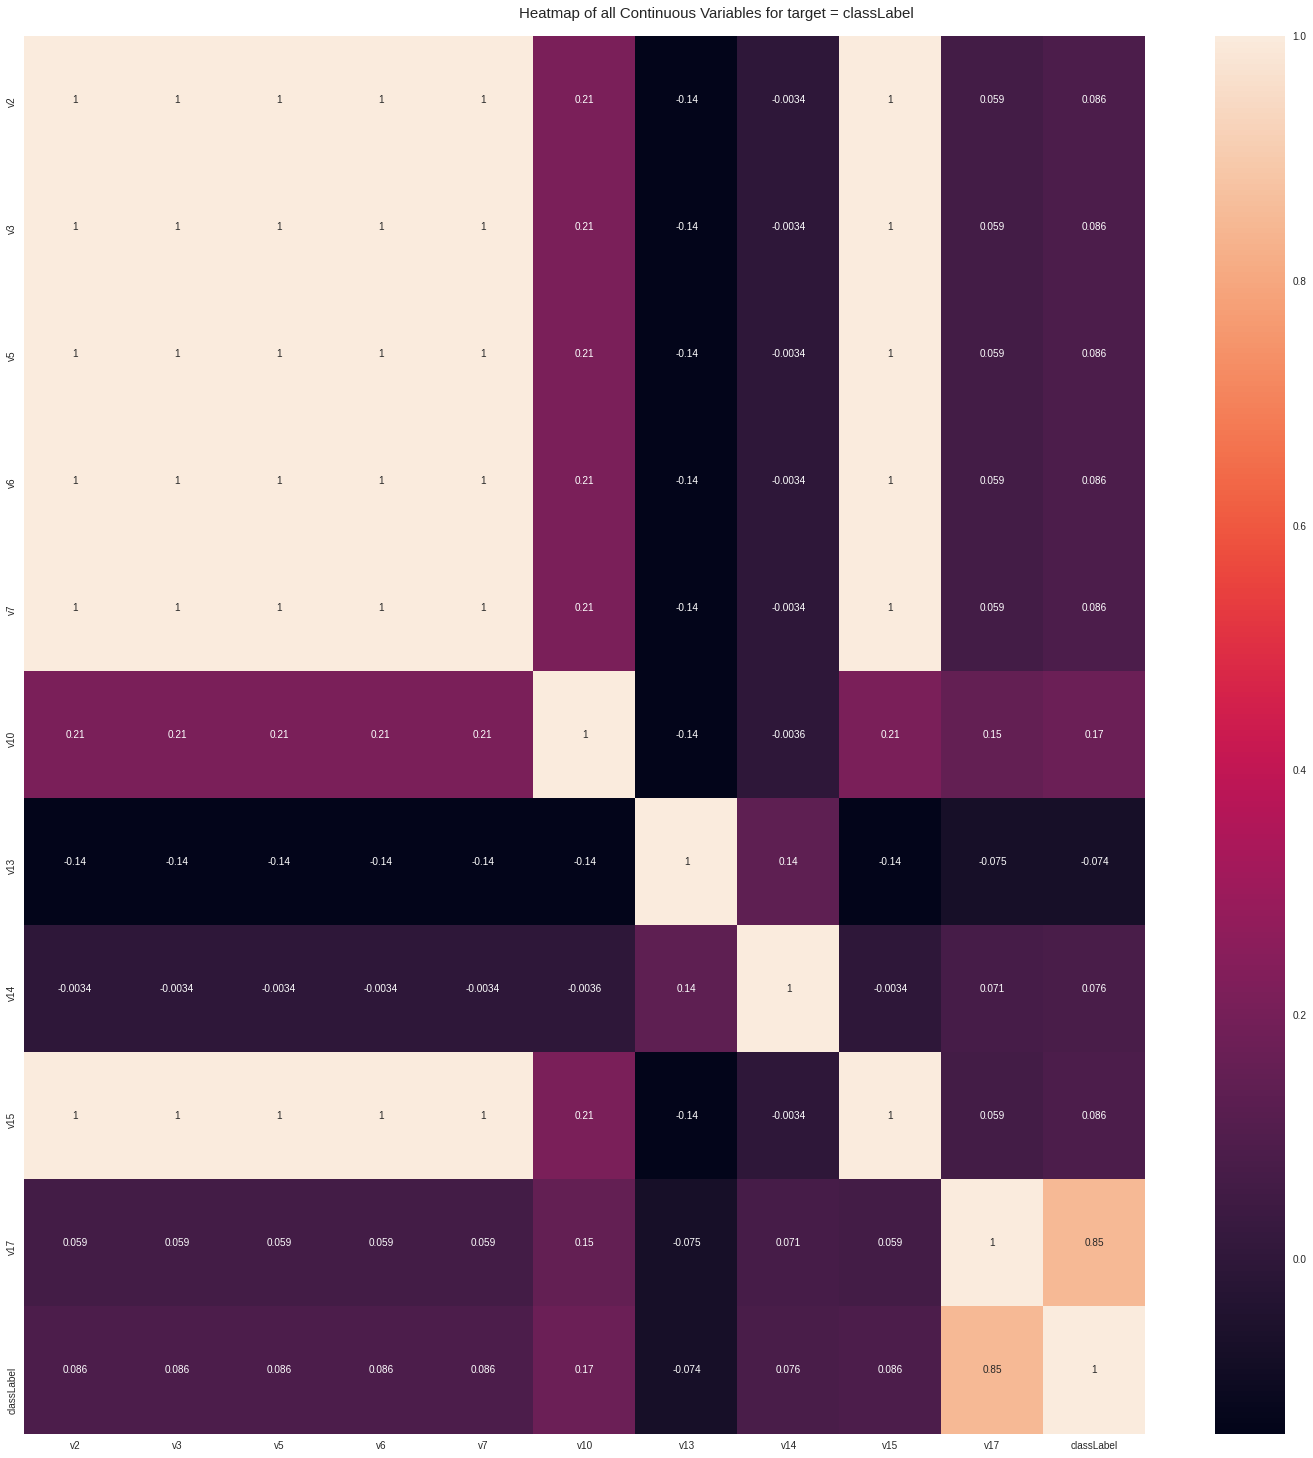

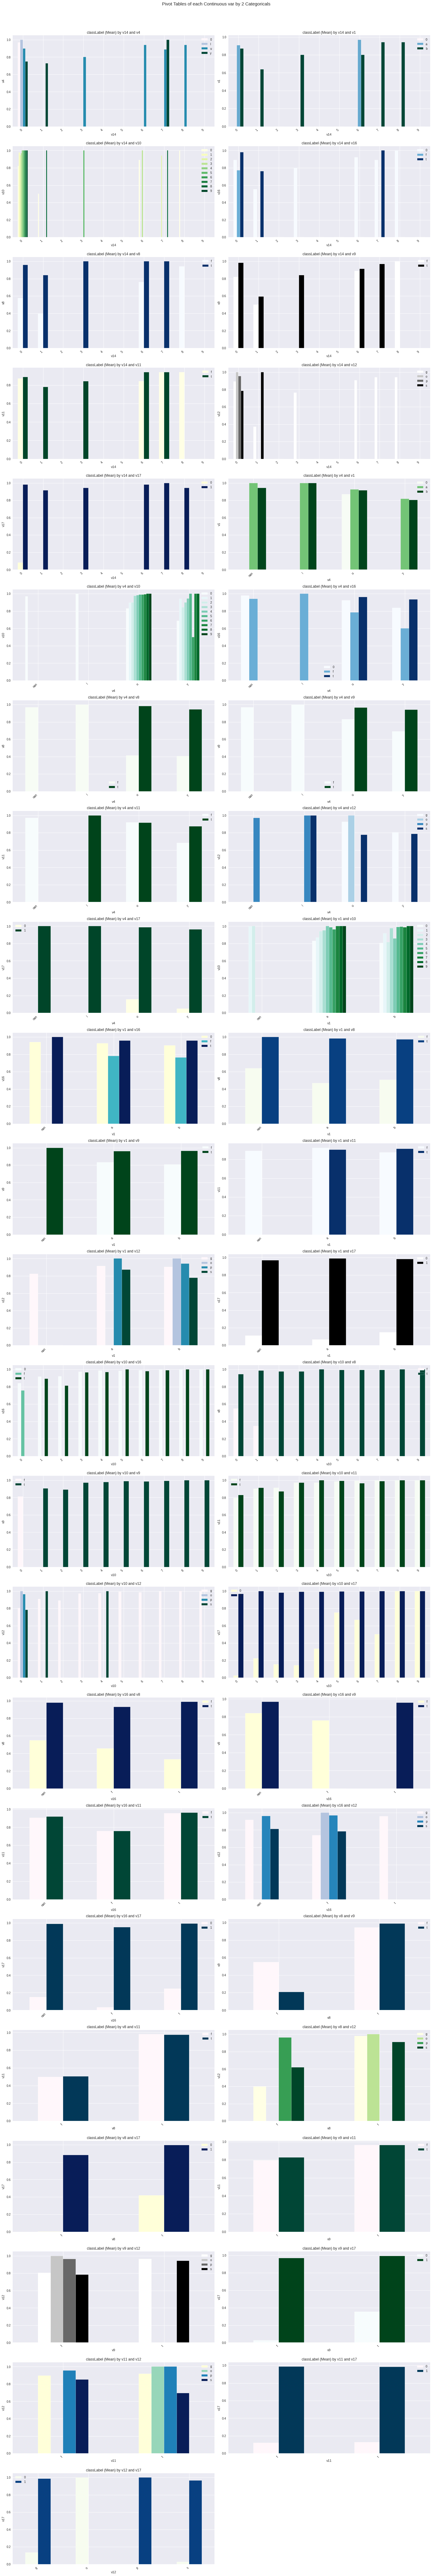

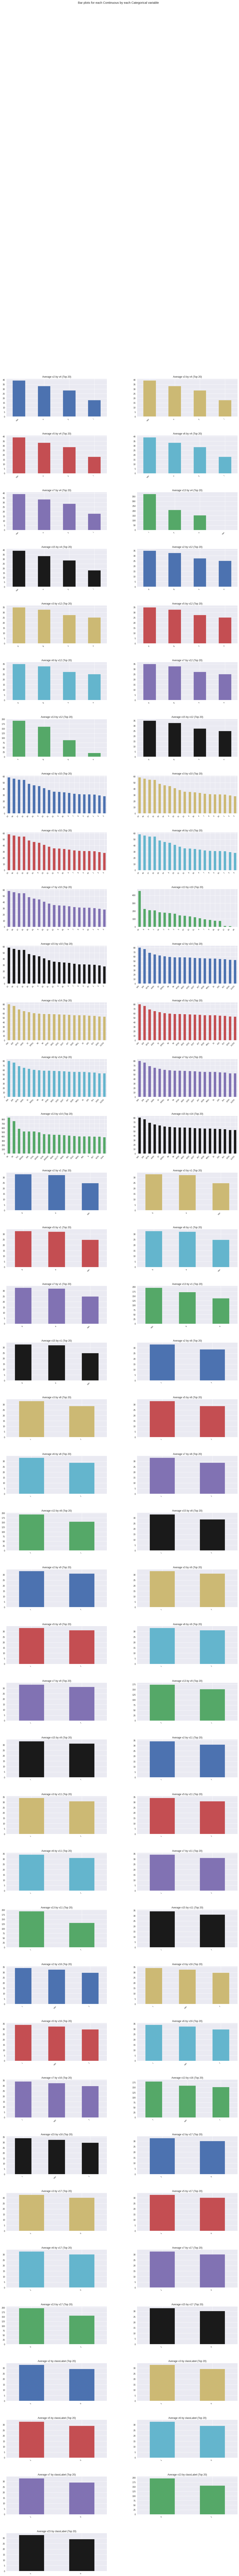

Time to run AutoViz (in seconds) = 36.330

 ###################### VISUALIZATION Completed ########################


In [24]:
# Instantiate the library
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

filename = ""
sep = ","

dft = AV.AutoViz(
    filename,
    sep,
    depVar=target,
    dfte=X_y_data,
    header=0,
    verbose=1,
    lowess=True,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

#### ii) Actions from Autoviz Report

In [25]:
#dict_ = {}

## g) missingno

#### i) Report

In [26]:
import missingno as msno

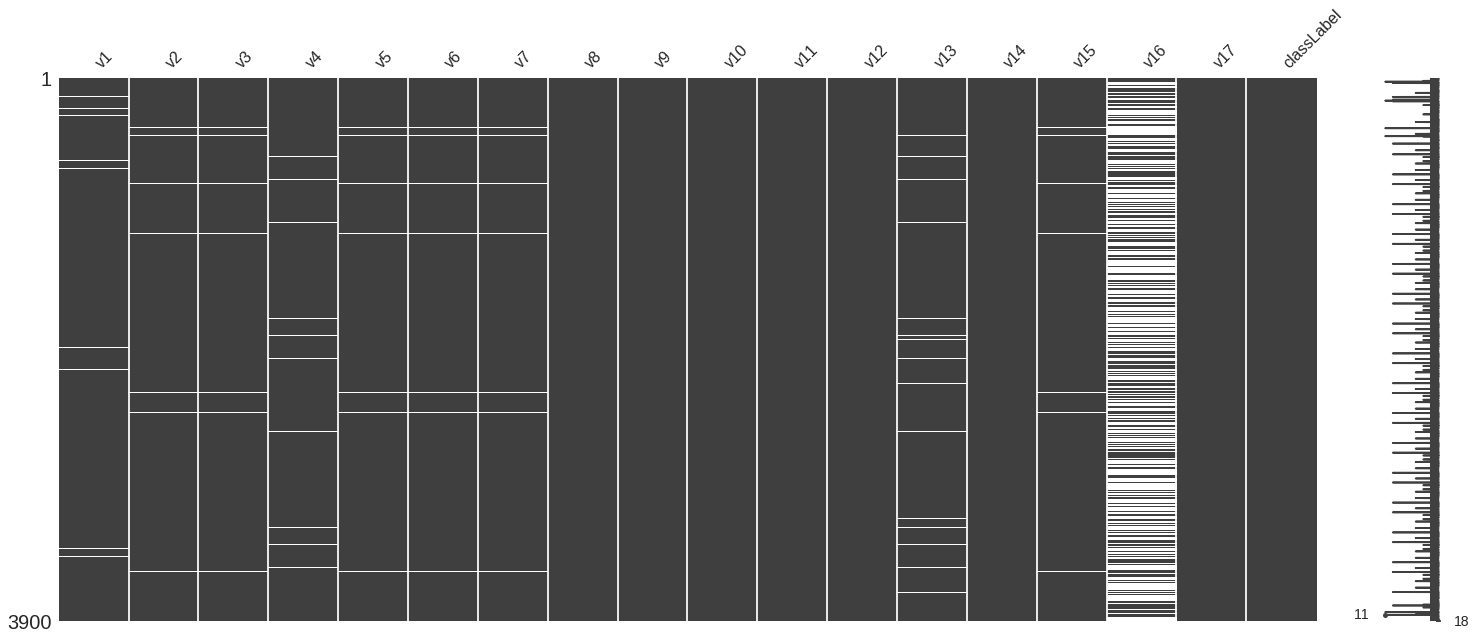

In [27]:
msno.matrix(X_y_data)
#msno.matrix(X_y_data.sample(50))

#### ii) Actions from missingno Report

In [ ]:
# dict_ml_missing_data = {}
# dict_ml_missing_data[''] = ''
# dict_ml_missing_data[''] = ''
# dict_ml_missing_data[''] = ''
# dict_ml_missing_data[''] = ''

In [ ]:
import json

# Serialize dataa into file:
json.dump(dict_ml_missing_data, open(relative_filepath + "reports/dicts/dict_ml_missing_data.json", 'w'))

## Dora - WHICH SECTION SHOULD THIS BE IN

In [ ]:
from Dora import Dora

# Read the dataframe into the Dora format, specifying the target column in output
dora = Dora(output = 'class', data = data)
# Impute missing values
dora.impute_missing_values()
# Scale values
dora.scale_input_values()
# Save a specific version of the data
dora.snapshot('cleaned_data')
# Track changes to the data
dora.logs


## Pretty Pandas

In [ ]:
from prettypandas import PrettyPandas

# Convert the class to a numeric data type
data['class'] = data['class'].astype('float64')
# Summarise the data set using the Pandas groupby function
df_grp = data.groupby('class').mean()
# Add an overall average to the table
PrettyPandas(df_grp).average()